In [14]:
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score


In [9]:
def read_corpus_to_dataframe(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                token, label = parts
                data.append({'token': token, 'label': label})
                
    return pd.DataFrame(data)


In [10]:
df = read_corpus_to_dataframe('./data/es-en/train.conll')


In [11]:
#df.shape
#size in byte
#df.size
# class 2: en, class 3: es
#number of classes and their counts: 8 classes from 0 to 7
df['label'].value_counts()

label
lang2        112988
lang1         80437
other         54060
ne             5187
ambiguous       266
unk             218
mixed            42
fw               23
Name: count, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['token'], df['label'], test_size=0.2, random_state=42)

# vectorization + classfieur svm
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=1, max_df=0.5, ngram_range=(1,3))),
    ('svm', SVC(kernel='linear'))
])

# row counts of each : 202574 rows for each x y train, 50645 rows for each x y test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(202576,)
(202576,)
(50645,)
(50645,)


In [16]:
# Step 4: Model training
start_time = time.time()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.5, ngram_range=(1, 3))),
                ('svm', SVC(kernel='linear'))])

In [17]:
# Step 5: Model evaluation
predictions = pipeline.predict(X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training and evaluation took {elapsed_time:.2f} seconds.")
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

Training and evaluation took 1175.52 seconds.


/Users/lydia/miniconda3/envs/extra-info/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lydia/miniconda3/envs/extra-info/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   ambiguous       0.00      0.00      0.00        56
          fw       1.00      0.25      0.40         4
       lang1       0.98      0.83      0.90     16042
       lang2       0.98      0.86      0.91     22751
       mixed       0.00      0.00      0.00        11
          ne       0.88      0.54      0.66      1025
       other       0.66      1.00      0.79     10723
         unk       0.00      0.00      0.00        33

    accuracy                           0.87     50645
   macro avg       0.56      0.43      0.46     50645
weighted avg       0.90      0.87      0.88     50645

Accuracy: 0.8717938592161122


/Users/lydia/miniconda3/envs/extra-info/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


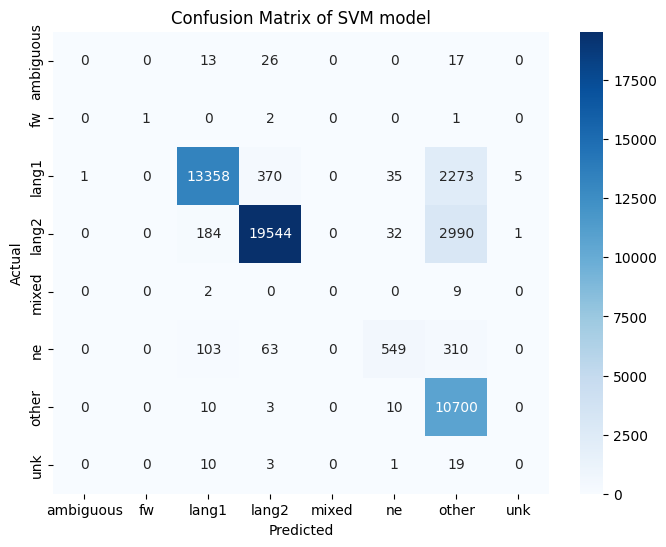

In [36]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=label_counts.index, yticklabels=label_counts.index)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix of SVM model')
plt.show()

In [40]:

'''filtered_indices = (y_test == "lang1") | (y_test == "lang2")
filtered_y_test = y_test[filtered_indices]
filtered_predictions = predictions[filtered_indices]
filtered_cm = confusion_matrix(filtered_y_test, filtered_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['lang1', 'lang2'], yticklabels=['lang1', 'lang2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Filtered Confusion Matrix of SVM model')
plt.show()
'''

'filtered_indices = (y_test == "lang1") | (y_test == "lang2")\nfiltered_y_test = y_test[filtered_indices]\nfiltered_predictions = predictions[filtered_indices]\nfiltered_cm = confusion_matrix(filtered_y_test, filtered_predictions)\nplt.figure(figsize=(8,6))\nsns.heatmap(cm, annot=True, fmt="d", cmap=\'Blues\', xticklabels=[\'lang1\', \'lang2\'], yticklabels=[\'lang1\', \'lang2\'])\nplt.ylabel(\'Actual\')\nplt.xlabel(\'Predicted\')\nplt.title(\'Filtered Confusion Matrix of SVM model\')\nplt.show()\n'